In [1]:
# import tensorflow as tf

# import os
# import tensorflow_datasets as tfds

In [2]:
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# print("All devices: ", tf.config.list_logical_devices('TPU'))

# Data collection

In [3]:
# library
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AndrewSukardi/Text-Mining/main/data_1A.csv')

In [5]:
df

,Unnamed: 0,text,label
0,0,Tuberculous peritonitis: a study comparing cir...,cardiovascular diseases
1,1,Clinical and Doppler echocardiographic follow-...,general pathological conditions
2,2,Pulmonary embolism presenting as exercise-indu...,nervous system diseases
3,3,Pancreatitis. Pancreatitis is a common but rat...,cardiovascular diseases
4,4,Xeroderma pigmentosum: review and report of a ...,general pathological conditions
...,...,...,...
3604,3604,Alkaline reflux gastritis. Alkaline reflux gas...,cardiovascular diseases
3605,3605,Skin reflectance pulse oximetry: in vivo measu...,general pathological conditions
3606,3606,Orocaecal transit time in Duchenne muscular dy...,neoplasms
3607,3607,Myelopathic neurosarcoidosis: diagnostic value...,neoplasms


There is a total of 3609 data with 2 feature

# Explatory Data Analaysis

In [6]:
# library
import matplotlib.pyplot as plt

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3609 non-null   int64 
 1   text        3609 non-null   object
 2   label       3609 non-null   object
dtypes: int64(1), object(2)
memory usage: 84.7+ KB


In [8]:
df['Unnamed: 0'].nunique()

3609

Unnamed: 0 will be dropped because it served as an index with all rows being unique

In [9]:
# Count target label
target_labels = (df['label'].value_counts()).index.tolist()
print(target_labels)

['general pathological conditions', 'digestive system diseases', 'nervous system diseases', 'neoplasms', 'cardiovascular diseases']


In [10]:
# Count target distribition
label_counts = df['label'].value_counts()
print(label_counts)

label
general pathological conditions    1172
digestive system diseases           797
nervous system diseases             753
neoplasms                           502
cardiovascular diseases             385
Name: count, dtype: int64


5 target label diseases

The data were **inbalance** and need to user oversampling or undersampling before modeling

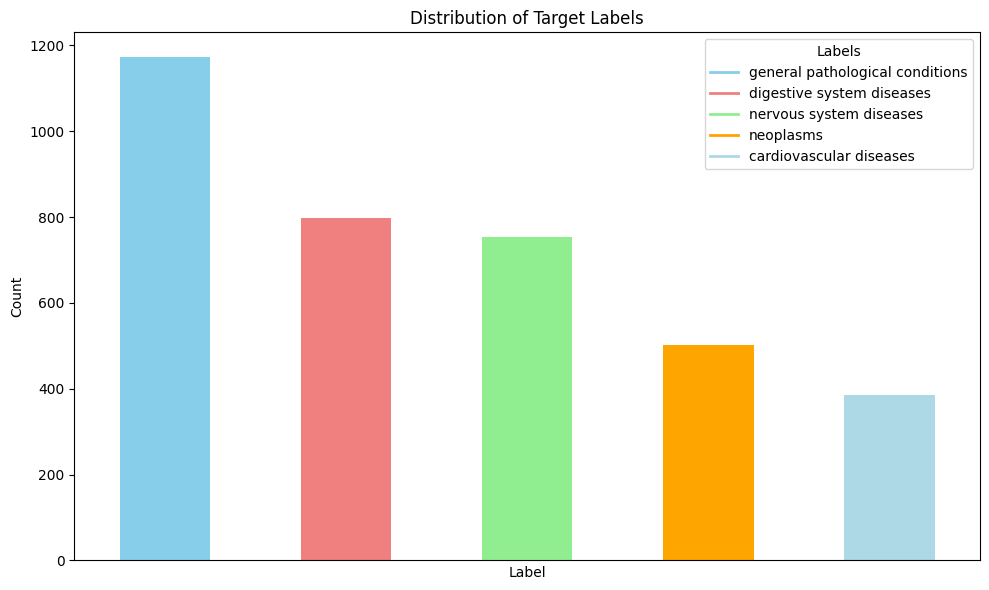

In [11]:
# Define the colors
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue', 'pink', 'yellow', 'purple']

# Visualize the distribution
plt.figure(figsize=(10, 6))
ax = label_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Target Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([])
legend_handles = [plt.Line2D([0], [0], color=colors[i], lw=2) for i in range(len(target_labels))]
ax.legend(legend_handles, target_labels, title='Labels', loc='best')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [12]:
# Library
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
# dropiing unamed:0
df = df.drop('Unnamed: 0',axis=1)

Unamed: 0 served as a index column and need to remove

## Preprocess text

In [14]:
# # libary
# import nltk
# import spacy
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# from nltk.corpus import stopwords
# from nltk.corpus import wordnet
# from nltk import pos_tag
# from nltk.tokenize import word_tokenize
# import re

# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from collections import Counter

In [15]:
# nltk.download('all')

In [16]:
# def clean_data(df):
#     # Tokenizing word into each token
#     mod = df.apply(lambda words: word_tokenize(words))

#     # Removing digit in words
#     mod = mod.apply(lambda words: [re.sub(r'[\d+]','', word) for word in words])

#     # removing symbol in words
#     mod = mod.apply(lambda words: [re.sub(r'[^\w]','', word) for word in words])

#     # removing white space in words
#     mod = mod.apply(lambda words: [re.sub(r'\s+', '', word) for word in words if word.strip()])

#     # lowering all the word
#     mod = mod.apply(lambda words: [word.lower() for word in words])

#     # removing stop word
#     # using NLTK libary to get English stopword
#     eng = stopwords.words('english')
#     mod = mod.apply(lambda words:[word for word in words if word not in eng])

#     # Lemmatization
#     nlp = spacy.load('en_core_web_sm')
#     mod = mod.apply(lambda words: [token.lemma_ for token in nlp(' '.join(words))])
#     return mod

In [17]:
# text =clean_data(df['text'])

In [18]:
# print(text)

# Model

In [19]:
!pip install sentencepiece
# !pip install tensorflow-gpu

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import XLNetTokenizer, TFXLNetModel
from tensorflow.keras.utils import plot_model


The ratio of split :
- 80% Train
- 10% Validation
- 10% Test

In [21]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

# Map labels to integers
labels = {'general pathological conditions': 0,
          'digestive system diseases': 1,
          'nervous system diseases': 2,
          'neoplasms': 3,
          'cardiovascular diseases': 4}

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [22]:
class Dataset(tf.keras.utils.Sequence):
    def __init__(self, df, tokenizer, max_length=512, batch_size=2):
        self.texts = df['text'].tolist()
        self.labels = [labels[label] for label in df['label']]
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.texts) / self.batch_size))

    def __getitem__(self, idx):
        batch_texts = self.texts[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_labels = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]

        # Tokenize the batch
        batch_encoding = tokenizer(batch_texts, max_length=self.max_length, padding='max_length', truncation=True, return_tensors='tf')

        return {'input_ids': batch_encoding['input_ids'], 'attention_mask': batch_encoding['attention_mask']}, tf.keras.utils.to_categorical(batch_labels, num_classes=5)

In [23]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42),
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

2887 361 361


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [24]:
class XLNetClassifier(tf.keras.Model):
    def __init__(self, num_classes=5):
        super(XLNetClassifier, self).__init__()
        self.xlnet = TFXLNetModel.from_pretrained('xlnet-base-cased')
        self.flatten = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False, mask=None):
        outputs = self.xlnet(inputs['input_ids'], attention_mask=inputs['attention_mask'], training=training)
        pooled_output = outputs['last_hidden_state'][:, 0, :]
        flattened_output = self.flatten(pooled_output)
        logits = self.dense(flattened_output)
        return logits

In [25]:
def train(model, train_dataset, val_dataset, learning_rate, epochs):
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    hist = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs,batch_size=2)
    return hist

In [26]:
train_dataset = Dataset(df_train, tokenizer)
val_dataset = Dataset(df_val, tokenizer)

# Create XLNet classifier model
model = XLNetClassifier()

# Train the model
history = train(model, train_dataset, val_dataset, learning_rate=2e-5, epochs=5)

tf_model.h5:   0%|          | 0.00/565M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetMo

Epoch 1/5
1444/1444 [==============================] - 510s 321ms/step - loss: 1.4815 - accuracy: 0.4451 - precision: 0.5178 - recall: 0.3131 - val_loss: 1.0871 - val_accuracy: 0.5873 - val_precision: 0.6616 - val_recall: 0.4820
Epoch 2/5
1444/1444 [==============================] - 434s 301ms/step - loss: 1.0445 - accuracy: 0.5871 - precision: 0.6255 - recall: 0.4988 - val_loss: 0.9645 - val_accuracy: 0.6205 - val_precision: 0.6485 - val_recall: 0.5263
Epoch 3/5
1444/1444 [==============================] - 435s 301ms/step - loss: 0.9194 - accuracy: 0.6411 - precision: 0.6816 - recall: 0.5812 - val_loss: 1.1182 - val_accuracy: 0.5568 - val_precision: 0.5888 - val_recall: 0.5235
Epoch 4/5
1444/1444 [==============================] - 435s 301ms/step - loss: 0.7728 - accuracy: 0.6945 - precision: 0.7236 - recall: 0.6491 - val_loss: 1.3074 - val_accuracy: 0.5679 - val_precision: 0.5870 - val_recall: 0.5235
Epoch 5/5
1444/1444 [==============================] - 435s 301ms/step - loss: 0.665

In [27]:
accuracy = history.history['accuracy']
precision = history.history['precision']
recall = history.history['recall']
    
# Calculate F1 score
f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]

print('Accuracy of the model (last epoch) :',round(accuracy[-1],3))                   
print('precision of the model (last epoch) :',round(precision[-1],3))
print('Recall of the model (last epoch) :',round(recall[-1],3))
print('F1 of the model (last epoch) :',round(f1[-1],3))

val_accuracy = history.history['val_accuracy']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']
print()
    
# Calculate F1 score
val_f1 = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(val_precision, val_recall)]

print('Validation Accuracy of the model (last epoch) :',round(val_accuracy[-1],3))                   
print('Validation precision of the model (last epoch) :',round(val_precision[-1],3))
print('Validation Recall of the model (last epoch) :',round(val_recall[-1],3))
print('Validation F1 of the model (last epoch) :',round(val_f1[-1],3))

Accuracy of the model (last epoch) : 0.747
precision of the model (last epoch) : 0.769
Recall of the model (last epoch) : 0.71
F1 of the model (last epoch) : 0.738

Validation Accuracy of the model (last epoch) : 0.593
Validation precision of the model (last epoch) : 0.611
Validation Recall of the model (last epoch) : 0.54
Validation F1 of the model (last epoch) : 0.574


In [28]:
test_dataset = Dataset(df_test, tokenizer)
y_pred = model.predict(test_dataset)

181/181 [==============================] - 18s 83ms/step
